# Practical Task 1 of T22

In [1]:
# Import all libraries for calculation
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from skimage import exposure

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
digits = load_digits()

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


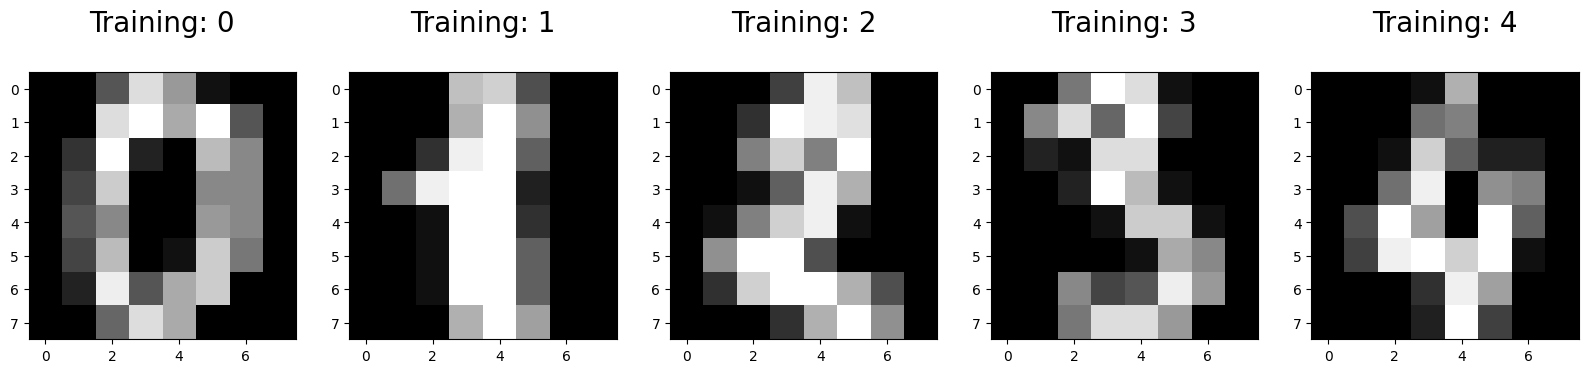

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
# Set variable for random seed
r_seed = 852

# Set default test size as 20% with 80% of training set 
test_size = 0.2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=test_size, random_state=r_seed)

In [6]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1437, 64)
y_train.shape:  (1437,)
X_test.shape:  (360, 64)
y_test.shape:  (360,)


### Purpose of spliting the training set and test set

By spliting the dataset into training set and test set, so that the randomness can ensure the machine learning will not by overfitting by the existing pattern of the data and increase the ability and precision of the forecasting.

###　Create base Random Forest 

In [7]:
# Create a Random Forest Classifier
forest = RandomForestClassifier(random_state=r_seed)

In [8]:
# Train the classifier with training data set in Random Forest
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=852)

In [9]:
# Make predictions on the test set with Random Forest
y_pred = forest.predict(X_test)

In [10]:
# Evaluate the base random forest classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')   # weighted
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [11]:
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

accuracy:  0.975
precision:  0.9751118465404179
recall:  0.9750766438736364
f1:  0.9749019346866705


In [20]:
# Use GridSearchCV to see the best parameter for the random forest classifier
# Perform hyperparameter tuning using GridSearchCV
# It may take a longer time (a few mintues) for the system to run 
#param_grid = {
#    'n_estimators': [50,100,150,200],
#    'max_depth': [None,5, 10,15,20],
#    'min_samples_split': [2, 5, 10]
#}
param_grid = {
    'n_estimators':  list(range(1, 200)),
    'max_depth': list(range(1, 20)),
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=852),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [22]:
# Train the classifier with the best parameters in Random Forest
print('Best Param:',grid_search.best_params_)
print('Best Score:',grid_search.best_score_)

best_forest = grid_search.best_estimator_
best_forest.fit(X_train, y_train)

Best Param: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 139}
Best Score: 0.975648470770422


RandomForestClassifier(max_depth=10, n_estimators=139, random_state=852)

In [23]:
# Make predictions using the best parameters in the Random Forest
y_pred_best = best_forest.predict(X_test)

In [24]:
# Evaluate the performance of the best Random Forest
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='macro')
best_recall = recall_score(y_test, y_pred_best, average='macro')
best_f1 = f1_score(y_test, y_pred_best, average='macro')

In [25]:
print('best_accuracy: ', best_accuracy)
print('best_precision: ', best_precision)
print('best_recall: ', best_recall)
print('best_f1: ', best_f1)


best_accuracy:  0.9805555555555555
best_precision:  0.980591816306102
best_recall:  0.9797490391475353
best_f1:  0.980000432070882


### Grid Search CV Result and accuracy improvement
Best Param: for the Random Forest is {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 139}
But it will need 3 hours to compute by my machine

Accuract:   0.975               -> 0.9805555555555555
Prevision:  0.9751118465404179  -> 0.980591816306102
Recall:     0.9750766438736364  -> 0.9797490391475353
F1:         0.9749019346866705  -> 0.980000432070882

The overall accuracy increase by tuning the parameter n_estimators to 139 with max_depth 10 and min_samples_split 2 by the GridSearchCV. But it will take long time to discover by the computer calculation by the sampling.

My choice will be n_estimators, because it can increse the number of tree which can provide more room for the model to predict the result from different tree.

### Visualize the sample images and predicted labels

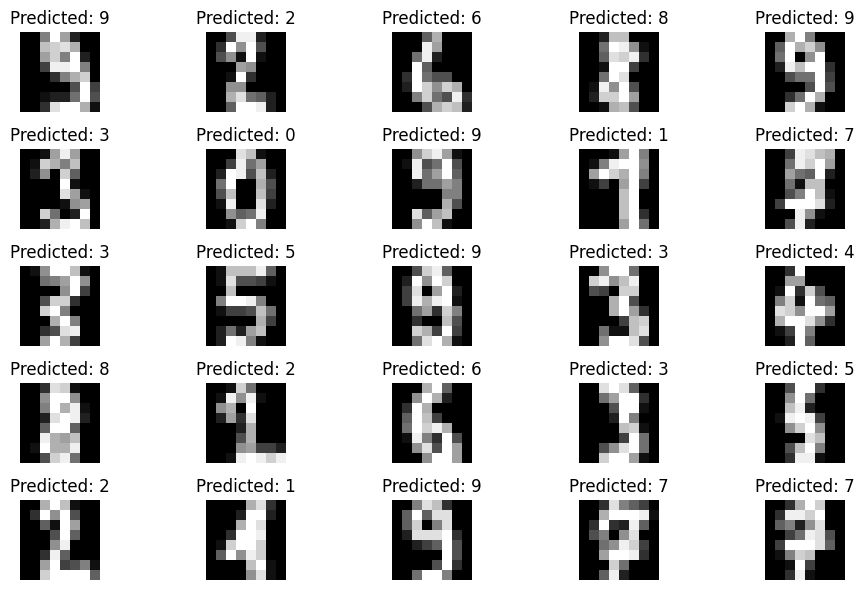

In [17]:
# Visualize some sample images and their predicted labels
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    image = X_test[i].reshape(8, 8)
    predicted_label = y_pred_best[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {predicted_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

###　Display confusion Matrix of base Random Forest and Best Random Forest

<Figure size 5000x1500 with 0 Axes>

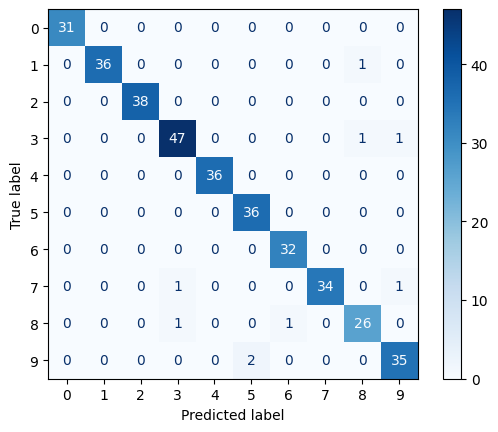

In [26]:
# Display the confusion matrix by the base random forest model
cm = confusion_matrix(y_pred, y_test,labels=[0,1,2,3,4,5,6,7,8,9])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')

<Figure size 5000x1500 with 0 Axes>

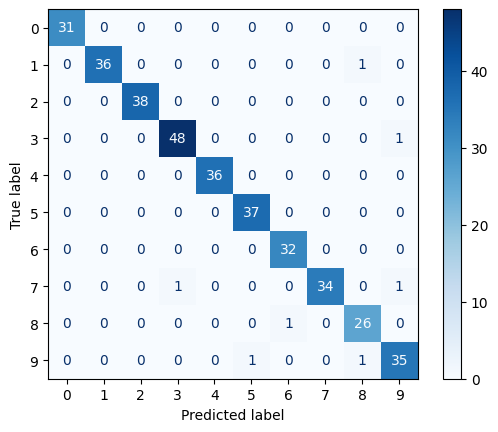

In [18]:
# Display the confusion matrix by the best random forest model
cm = confusion_matrix(y_pred_best, y_test,labels=[0,1,2,3,4,5,6,7,8,9])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')

### Conclusion by the confusion matrix

Comparing the result betwewn base random forest and best random forest, the struggling in 3 and 8 has been reduced. 
In overall, te struggles in 7 and 9 are near in the best random forest model